In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Summary of Weather.csv")

In [3]:
df.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

In [5]:
df.duplicated().sum()

np.int64(10)

In [6]:
df.drop_duplicates(keep="first", inplace=True)

In [7]:
df_null_rate = (df.isnull().mean() * 100).to_dict()

In [8]:
df_null_rate

{'STA': 0.0,
 'Date': 0.0,
 'Precip': 0.0,
 'WindGustSpd': 99.55305385197009,
 'MaxTemp': 0.0,
 'MinTemp': 0.0,
 'MeanTemp': 0.0,
 'Snowfall': 0.9770646055616231,
 'PoorWeather': 71.24002352348148,
 'YR': 0.0,
 'MO': 0.0,
 'DA': 0.0,
 'PRCP': 1.6231202217928251,
 'DR': 99.5522137276317,
 'SPD': 99.55305385197009,
 'MAX': 0.3982189364025876,
 'MIN': 0.39317819037217505,
 'MEA': 0.4183819205242376,
 'SNF': 0.9770646055616231,
 'SND': 95.32638830546921,
 'FT': 100.0,
 'FB': 100.0,
 'FTI': 100.0,
 'ITH': 100.0,
 'PGT': 99.5589347223389,
 'TSHDSBRSGF': 71.24002352348148,
 'SD3': 100.0,
 'RHX': 100.0,
 'RHN': 100.0,
 'RVG': 100.0,
 'WTE': 100.0}

In [9]:
# Drop columns with more than 70% missing values

for col, rate in df_null_rate.items():
    if rate > 70:
        df.drop(col, axis=1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119030 entries, 0 to 119039
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       119030 non-null  int64  
 1   Date      119030 non-null  object 
 2   Precip    119030 non-null  object 
 3   MaxTemp   119030 non-null  float64
 4   MinTemp   119030 non-null  float64
 5   MeanTemp  119030 non-null  float64
 6   Snowfall  117867 non-null  object 
 7   YR        119030 non-null  int64  
 8   MO        119030 non-null  int64  
 9   DA        119030 non-null  int64  
 10  PRCP      117098 non-null  object 
 11  MAX       118556 non-null  float64
 12  MIN       118562 non-null  float64
 13  MEA       118532 non-null  float64
 14  SNF       117867 non-null  object 
dtypes: float64(6), int64(4), object(5)
memory usage: 14.5+ MB


In [11]:
df = df.reset_index(drop=True)

In [12]:
columns = ["Precip", "Snowfall", "PRCP", "SNF"]

for col in columns:
    print(df[col].unique())
    print("*" * 70)

['1.016' '0' '2.54' 'T' '3.556' '0.508' '0.254' '1.778' '3.302' '0.762'
 '5.588' '5.08' '2.032' '25.654' '40.132' '19.05' '23.876' '4.064'
 '12.192' '2.794' '33.274' '19.304' '47.752' '6.35' '3.048' '8.382'
 '10.16' '27.178' '30.48' '45.212' '10.668' '15.494' '57.658' '58.166'
 '11.43' '31.242' '17.78' '26.924' '26.67' '6.604' '5.334' '4.826' '7.62'
 '8.636' '7.874' '12.446' '90.932' '13.462' '11.938' '5.842' '4.318'
 '6.096' '9.144' '4.572' '9.906' '9.652' '1.524' '13.97' '17.272' '33.528'
 '1.27' '13.716' '8.128' '22.352' '39.116' '36.068' '98.044' '3.81'
 '14.986' '78.232' '146.304' '14.732' '21.844' '120.904' '42.164' '23.368'
 '21.082' '44.958' '2.286' '50.038' '17.526' '51.054' '7.112' '25.4'
 '7.366' '16.256' '46.736' '8.89' '24.638' '11.684' '17.018' '144.78'
 '18.034' '50.8' '106.426' '36.576' '53.34' '34.798' '12.954' '26.416'
 '85.598' '47.498' '12.7' '11.176' '59.182' '33.782' '40.894' '28.194'
 '24.892' '14.478' '71.628' '102.108' '31.496' '36.322' '37.846' '35.56'
 '31.75

In [13]:
for col in columns:
    non_numeric = df[col].notna() & pd.to_numeric(df[col], errors='coerce').isna()
    
    if not non_numeric.all():
        print(f"{col}: {df.loc[non_numeric, col].unique()}")

Precip: ['T']
Snowfall: ['#VALUE!']
PRCP: ['T']
SNF: ['T']


In [15]:
df["Precip"] = df["Precip"].replace("T", np.nan).astype(float)
df["Snowfall"] = df["Snowfall"].replace("#VALUE!", np.nan).astype(float)
df["PRCP"] = df["PRCP"].replace("T", np.nan).astype(float)
df["SNF"] = df["SNF"].replace("T", np.nan).astype(float)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119030 entries, 0 to 119029
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       119030 non-null  int64  
 1   Date      119030 non-null  object 
 2   Precip    102278 non-null  float64
 3   MaxTemp   119030 non-null  float64
 4   MinTemp   119030 non-null  float64
 5   MeanTemp  119030 non-null  float64
 6   Snowfall  117823 non-null  float64
 7   YR        119030 non-null  int64  
 8   MO        119030 non-null  int64  
 9   DA        119030 non-null  int64  
 10  PRCP      100346 non-null  float64
 11  MAX       118556 non-null  float64
 12  MIN       118562 non-null  float64
 13  MEA       118532 non-null  float64
 14  SNF       117823 non-null  float64
dtypes: float64(10), int64(4), object(1)
memory usage: 13.6+ MB


In [17]:
df.isnull().sum()

STA             0
Date            0
Precip      16752
MaxTemp         0
MinTemp         0
MeanTemp        0
Snowfall     1207
YR              0
MO              0
DA              0
PRCP        18684
MAX           474
MIN           468
MEA           498
SNF          1207
dtype: int64

In [18]:
df.describe()    

,STA,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF
count,119030.000000,102278.000000,119030.000000,119030.000000,119030.000000,117823.000000,119030.000000,119030.000000,119030.000000,100346.000000,118556.000000,118562.000000,118532.000000,117823.000000
mean,29659.059456,3.754205,27.044545,17.789446,22.411320,0.245564,43.805184,6.726077,15.796715,0.150649,81.002750,64.273713,72.644307,0.009668
std,20954.049325,11.567099,8.717924,8.334910,8.298256,2.626711,1.136713,3.425698,8.794421,0.459294,14.869516,14.482087,14.211550,0.103414
min,10001.000000,0.000000,-33.333333,-38.333333,-35.555556,0.000000,40.000000,1.000000,1.000000,0.000000,-28.000000,-37.000000,-32.000000,0.000000
25%,11801.000000,0.000000,25.555556,15.000000,20.555556,0.000000,43.000000,4.000000,8.000000,0.000000,78.000000,59.000000,69.000000,0.000000
50%,22508.000000,0.000000,29.444444,21.111111,25.555556,0.000000,44.000000,7.000000,16.000000,0.000000,85.000000,70.000000,78.000000,0.000000
75%,33501.000000,1.524000,31.666667,23.333333,27.222222,0.000000,45.000000,10.000000,23.000000,0.070000,89.000000,74.000000,81.000000,0.000000
max,82506.000000,307.340000,50.000000,34.444444,40.000000,86.360000,45.000000,12.000000,31.000000,12.100000,122.000000,94.000000,104.000000,3.400000


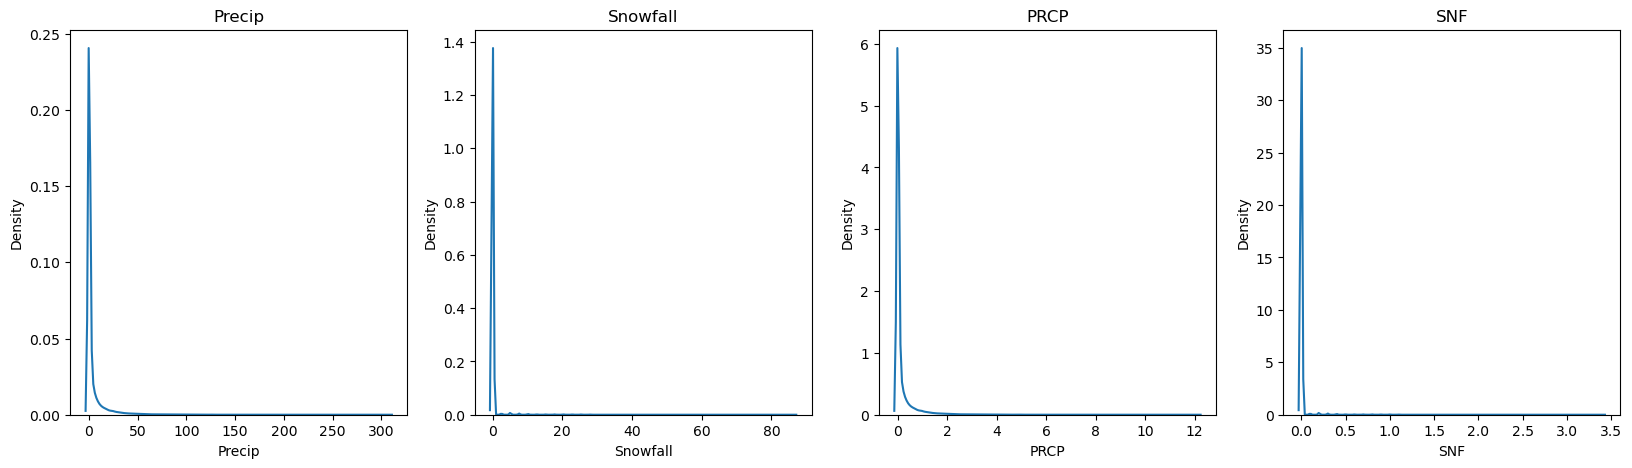

In [19]:
fig, axs = plt.subplots(nrows= 1, ncols=4, figsize=(20,5))

for i, col in enumerate(columns):
    sns.kdeplot(df[col], ax=axs[i])
    axs[i].set_title(col)
plt.show()    

In [20]:
# Filling NaN values with median
for col in columns:
    df[col] = df[col].fillna(df[col].median())

In [21]:
df.isnull().sum()

STA           0
Date          0
Precip        0
MaxTemp       0
MinTemp       0
MeanTemp      0
Snowfall      0
YR            0
MO            0
DA            0
PRCP          0
MAX         474
MIN         468
MEA         498
SNF           0
dtype: int64

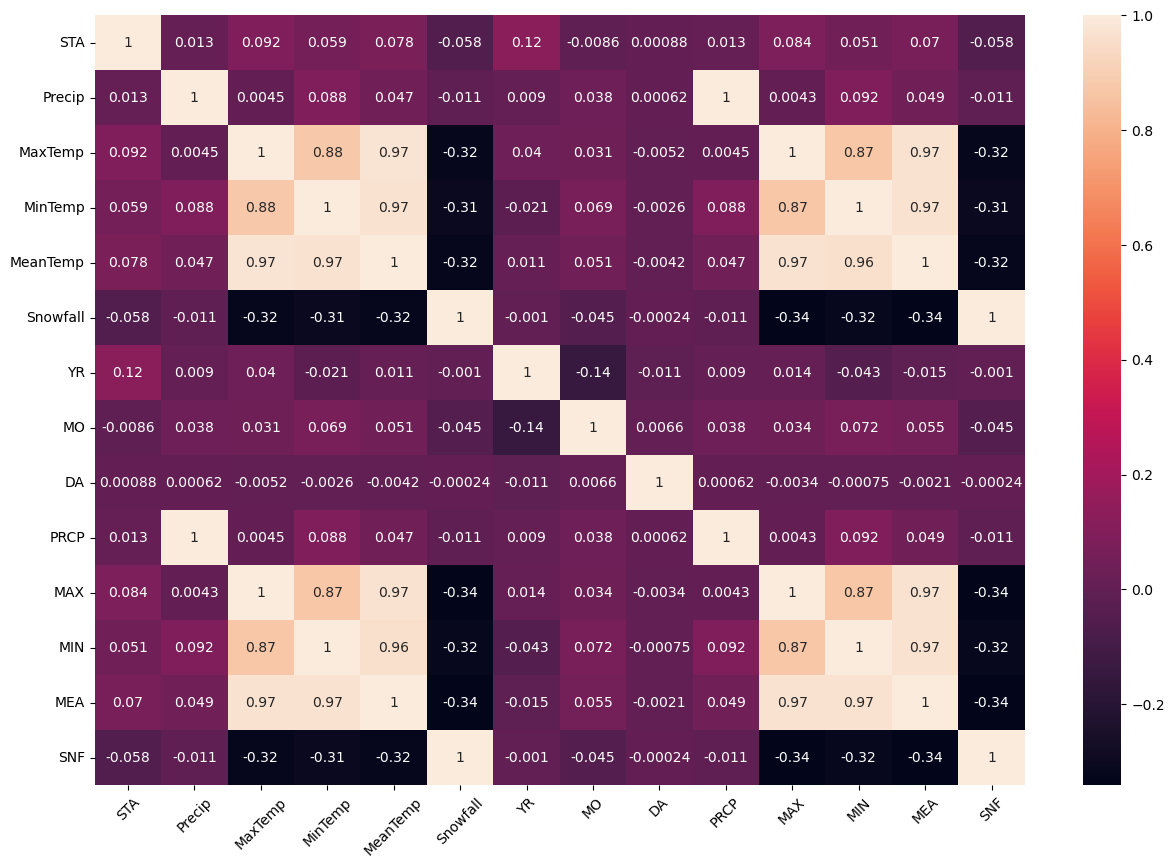

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.xticks(rotation=45)
plt.show()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119030 entries, 0 to 119029
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       119030 non-null  int64  
 1   Date      119030 non-null  object 
 2   Precip    119030 non-null  float64
 3   MaxTemp   119030 non-null  float64
 4   MinTemp   119030 non-null  float64
 5   MeanTemp  119030 non-null  float64
 6   Snowfall  119030 non-null  float64
 7   YR        119030 non-null  int64  
 8   MO        119030 non-null  int64  
 9   DA        119030 non-null  int64  
 10  PRCP      119030 non-null  float64
 11  MAX       118556 non-null  float64
 12  MIN       118562 non-null  float64
 13  MEA       118532 non-null  float64
 14  SNF       119030 non-null  float64
dtypes: float64(10), int64(4), object(1)
memory usage: 13.6+ MB


In [24]:
def correlation_pairs(df, threshold):
    correlated_pairs = set()
    corr = df.corr(numeric_only=True)
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i, j]) > threshold:
                correlated_pairs.add((corr.columns[i], corr.columns[j]))
    return correlated_pairs 

In [25]:
correlation_pairs(df, 0.85)

{('MAX', 'MaxTemp'),
 ('MAX', 'MeanTemp'),
 ('MAX', 'MinTemp'),
 ('MEA', 'MAX'),
 ('MEA', 'MIN'),
 ('MEA', 'MaxTemp'),
 ('MEA', 'MeanTemp'),
 ('MEA', 'MinTemp'),
 ('MIN', 'MAX'),
 ('MIN', 'MaxTemp'),
 ('MIN', 'MeanTemp'),
 ('MIN', 'MinTemp'),
 ('MeanTemp', 'MaxTemp'),
 ('MeanTemp', 'MinTemp'),
 ('MinTemp', 'MaxTemp'),
 ('PRCP', 'Precip'),
 ('SNF', 'Snowfall')}

In [26]:
df = df.drop(columns=["Date", "MAX","MIN","MEA","MinTemp", "PRCP", "SNF"], axis=1)

In [27]:
df.head()

,STA,Precip,MaxTemp,MeanTemp,Snowfall,YR,MO,DA
0,10001,1.016,25.555556,23.888889,0.0,42,7,1
1,10001,0.000,28.888889,25.555556,0.0,42,7,2
2,10001,2.540,26.111111,24.444444,0.0,42,7,3
3,10001,2.540,26.666667,24.444444,0.0,42,7,4
4,10001,0.000,26.666667,24.444444,0.0,42,7,5


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119030 entries, 0 to 119029
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       119030 non-null  int64  
 1   Precip    119030 non-null  float64
 2   MaxTemp   119030 non-null  float64
 3   MeanTemp  119030 non-null  float64
 4   Snowfall  119030 non-null  float64
 5   YR        119030 non-null  int64  
 6   MO        119030 non-null  int64  
 7   DA        119030 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 7.3 MB


In [29]:
df.isnull().sum()

STA         0
Precip      0
MaxTemp     0
MeanTemp    0
Snowfall    0
YR          0
MO          0
DA          0
dtype: int64

## Regression Modeling: Predicting "MeanTemp" with Cleaned Data

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [32]:
# Dependent & Independent Features
X = df.drop("MeanTemp", axis=1)
y = df["MeanTemp"]

In [33]:
X.shape, y.shape

((119030, 7), (119030,))

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=15)

In [35]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((101175, 7), (17855, 7), (101175,), (17855,))

In [36]:
# Scaling
scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

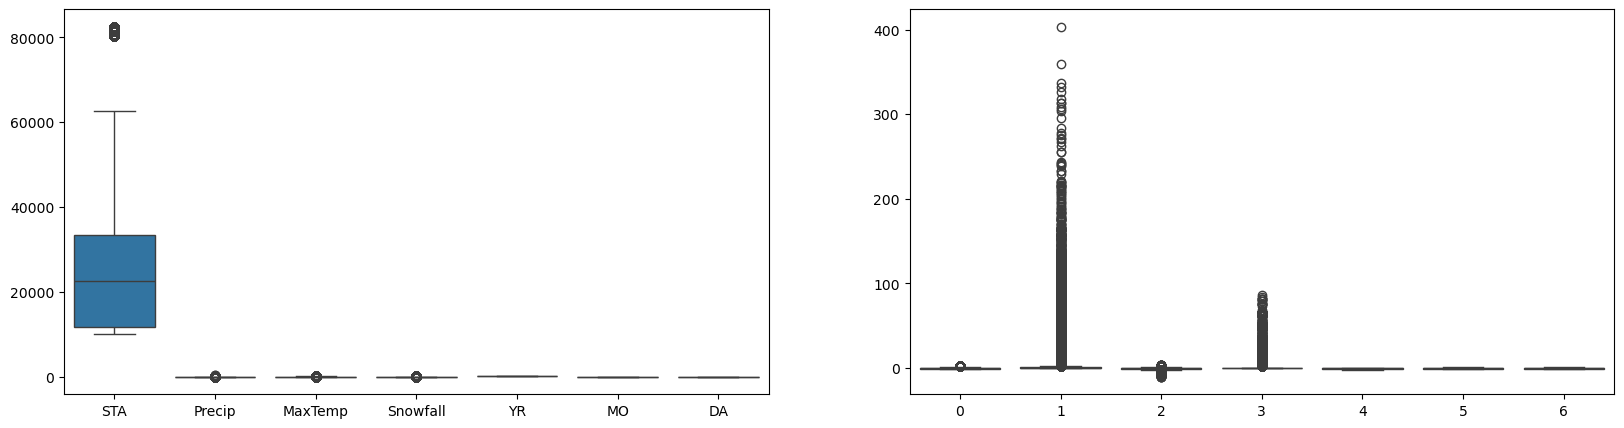

In [37]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(data=X_train)

plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)

plt.show()

In [3]:
# Linear Regression

Mean Absolute Error:  1.5323591696835013
Mean Squared Error:  4.335264591886722
R2 Score:  0.9368512505185276


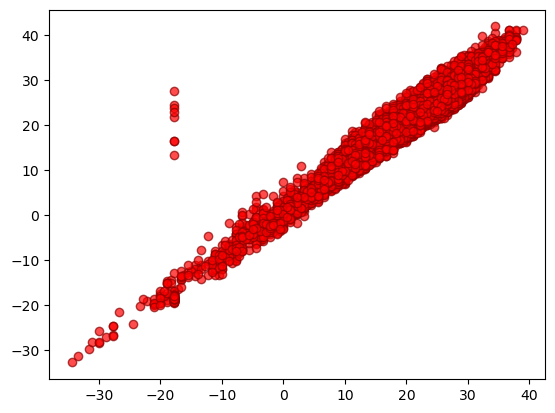

In [39]:
linear = LinearRegression()
linear.fit(X_train_scaled, y_train)
y_pred = linear.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)


print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("R2 Score: ", score)


plt.scatter(y_test, y_pred, color="red", edgecolors="darkred", alpha=0.7)
plt.show()

In [40]:
print(f"Coefficient: {linear.coef_}, \nInterception: {linear.intercept_}")

Coefficient: [-7.67174035e-02  2.44697138e-02  5.62141056e+00 -3.79772991e-02
 -3.60998476e-01  2.07724346e-01  5.41525012e-03], 
Interception: 24.52643684780238


In [41]:
# Lasso

Mean Absolute Error:  1.6621994895913315
Mean Squared Error:  4.920379629289668
R2 Score:  0.9283282913930454


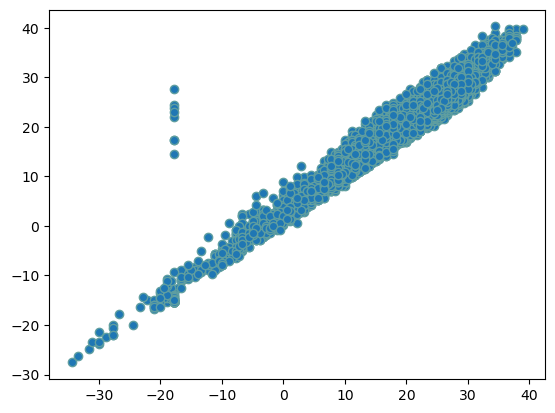

In [42]:
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("R2 Score: ", score)

plt.scatter(y_test, y_pred, edgecolors="cadetblue")
plt.show()

In [43]:
# LassoCV

Mean Absolute Error:  1.5325788490601442
Mean Squared Error:  4.337498396344641
R2 Score:  0.9368187122604551
Alpha:  0.011489589477528279


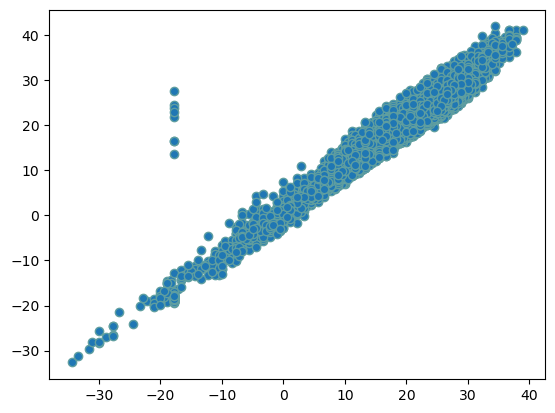

In [44]:
lassocv = LassoCV(cv=5)                           
lassocv.fit(X_train_scaled, y_train)
y_pred = lassocv.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Alpha: ", lassocv.alpha_)
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("R2 Score: ", score)

plt.scatter(y_test, y_pred, edgecolors="cadetblue")
plt.show()

In [45]:
# Ridge

Mean Absolute Error:  1.5323592102786137
Mean Squared Error:  4.335264826046439
R2 Score:  0.9368512471076877


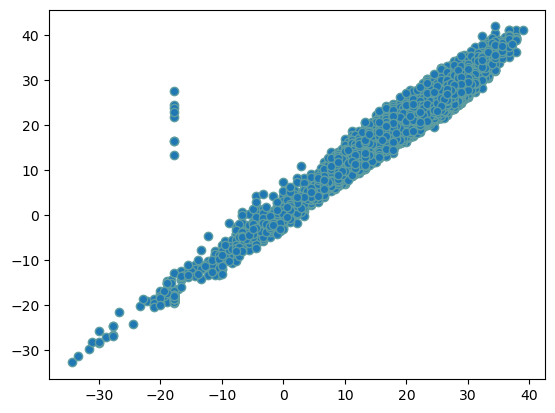

In [46]:
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("R2 Score: ", score)

plt.scatter(y_test, y_pred, edgecolors="cadetblue")
plt.show()

In [47]:
# RidgeCV

Alpha:  1.0
Mean Absolute Error:  1.5323592102786137
Mean Squared Error:  4.335264826046439
R2 Score:  0.9368512471076877


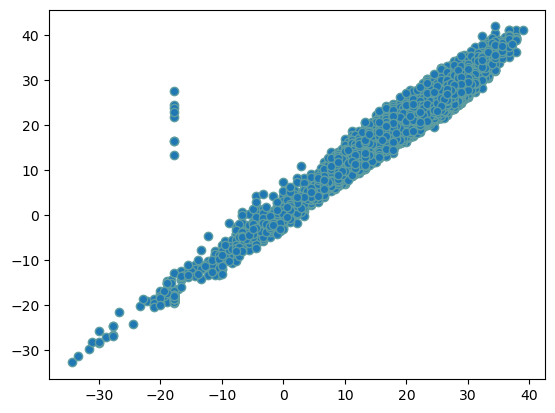

In [48]:
ridgecv = RidgeCV(cv=5)                            
ridgecv.fit(X_train_scaled, y_train)
y_pred = ridgecv.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Alpha: ", ridgecv.alpha_)
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("R2 Score: ", score)


plt.scatter(y_test, y_pred, edgecolors="cadetblue")
plt.show()

In [49]:
# ElasticNet

Mean Absolute Error:  2.1156877052851635
Mean Squared Error:  7.872880019437978
R2 Score:  0.8853212952732809


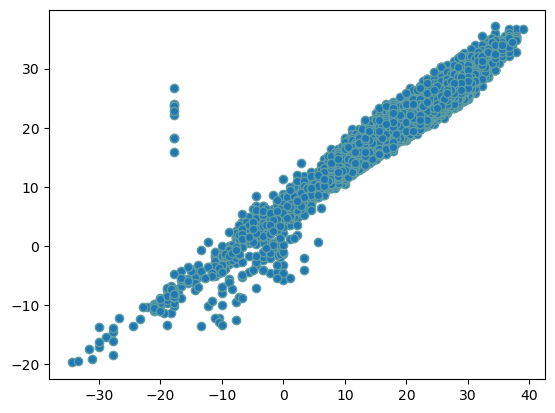

In [50]:
elastic = ElasticNet()
elastic.fit(X_train_scaled, y_train)
y_pred = elastic.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("R2 Score: ", score)

plt.scatter(y_test, y_pred, edgecolors="cadetblue")
plt.show()

In [51]:
# ElasticNetCV

Alpha:  0.022979178955056558
Mean Absolute Error:  1.533392089968733
Mean Squared Error:  4.341143444958924
R2 Score:  0.9367656174015572


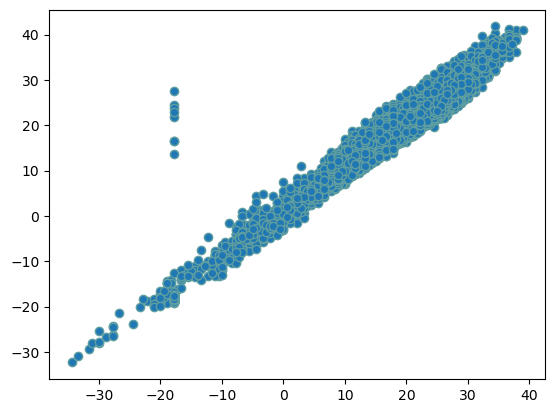

In [52]:
elasticnetcv = ElasticNetCV(cv=5)                           
elasticnetcv.fit(X_train_scaled, y_train)
y_pred = elasticnetcv.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Alpha: ", elasticnetcv.alpha_)
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("R2 Score: ", score)


plt.scatter(y_test, y_pred, edgecolors="cadetblue")
plt.show()